In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Uppgift 1 - uppvärmning covid-19 data
a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. 

info(),
describe(), value_counts(), head(), columns, index för att snabbt få en överblick.


In [9]:
weekly_data_sweden = pd.read_excel("data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")

# first_sheet.info()
# first_sheet.head()
# first_sheet.describe()
# first_sheet.value_counts()
# first_sheet.columns

### b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:

In [10]:
# Concatenating "år" and "veckonummer" into the desired format
weekly_data_sweden["Datum"] = weekly_data_sweden['år'].astype(str) + "v" + weekly_data_sweden["veckonummer"].astype(str)

# Displaying the updated DataFrame to verify the changes
weekly_data_sweden[["Datum"]].head()

# Drop the "år" and "veckonummer" columns
weekly_data_sweden.drop(['år', 'veckonummer'], axis=1, inplace=True)

# Saving the modified DataFrame into a new Excel file
output_file_path = 'data/Modified_Folkhalsomyndigheten_Covid19.xlsx'
weekly_data_sweden.to_excel(output_file_path, sheet_name='datum', index=False)






### c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu.


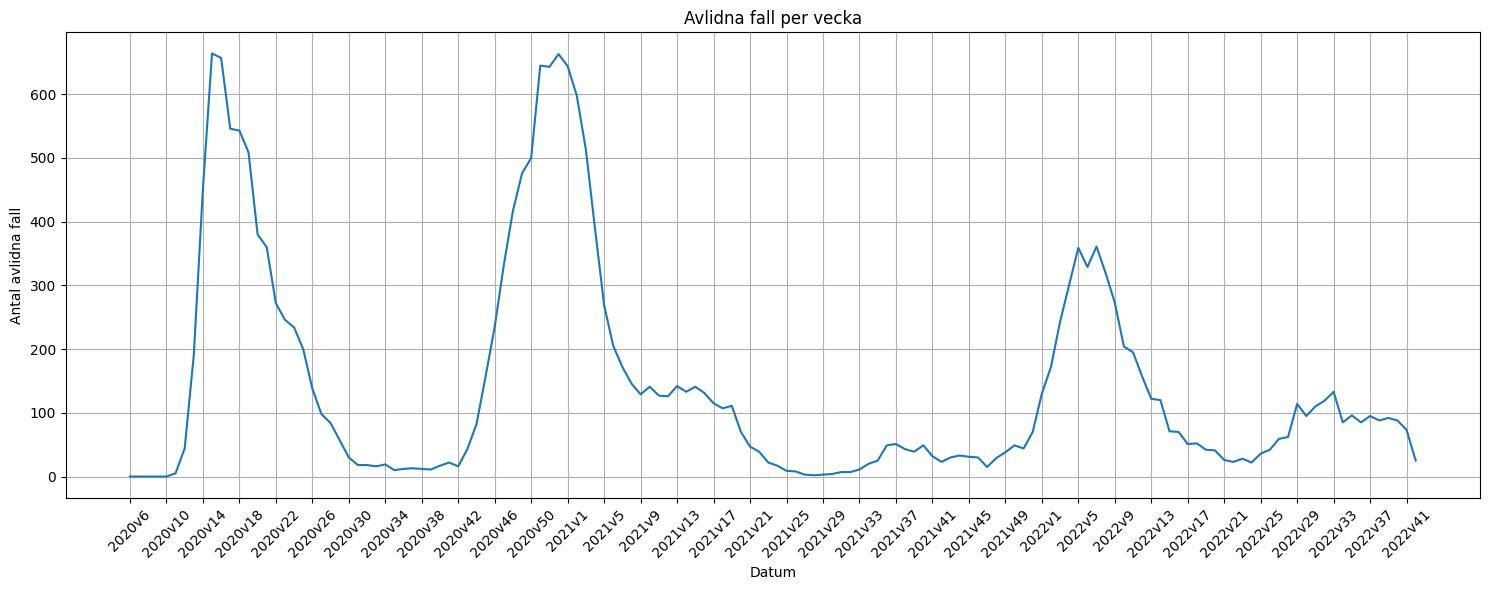

In [11]:
# Creating the line plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Datum', y='Antal_avlidna_vecka', data=weekly_data_sweden)
plt.title('Avlidna fall per vecka')
plt.xlabel('Datum')
plt.ylabel('Antal avlidna fall')

# Setting x-ticks to show every 4 weeks
# Extract every 4th week from 'Datum' column
every_4th_week = weekly_data_sweden['Datum'].iloc[::4]

# Set these as x-ticks
plt.xticks(ticks=np.arange(len(weekly_data_sweden['Datum']))[::4], labels=every_4th_week, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.savefig("Visualiseringar/avlidna_fall_per_vecka_2020v6_till_nu") # Saves the figure to Visualiseringar
# Show the plot
plt.show()



### d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.

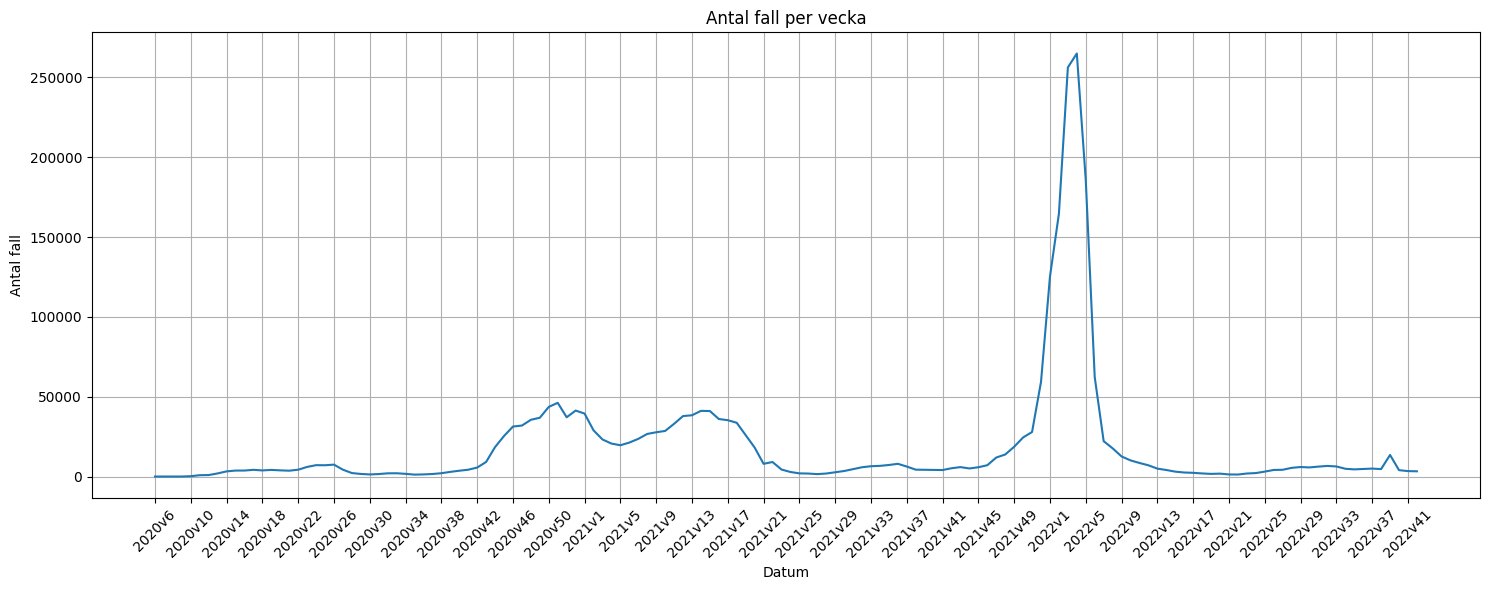

In [12]:
# Creating the line plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Datum', y='Antal_fall_vecka', data=weekly_data_sweden)
plt.title('Antal fall per vecka')
plt.xlabel('Datum')
plt.ylabel('Antal fall')

# Setting x-ticks to show every 4 weeks
# Extract every 4th week from 'Datum' column
every_4th_week = weekly_data_sweden['Datum'].iloc[::4]

# Set these as x-ticks
plt.xticks(ticks=np.arange(len(weekly_data_sweden['Datum']))[::4], labels=every_4th_week, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.savefig("Visualiseringar/antal_fall_per_vecka_2020v6_till_nu") # Saves the figure to Visualiseringar
# Show the plot
plt.show()

### e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.


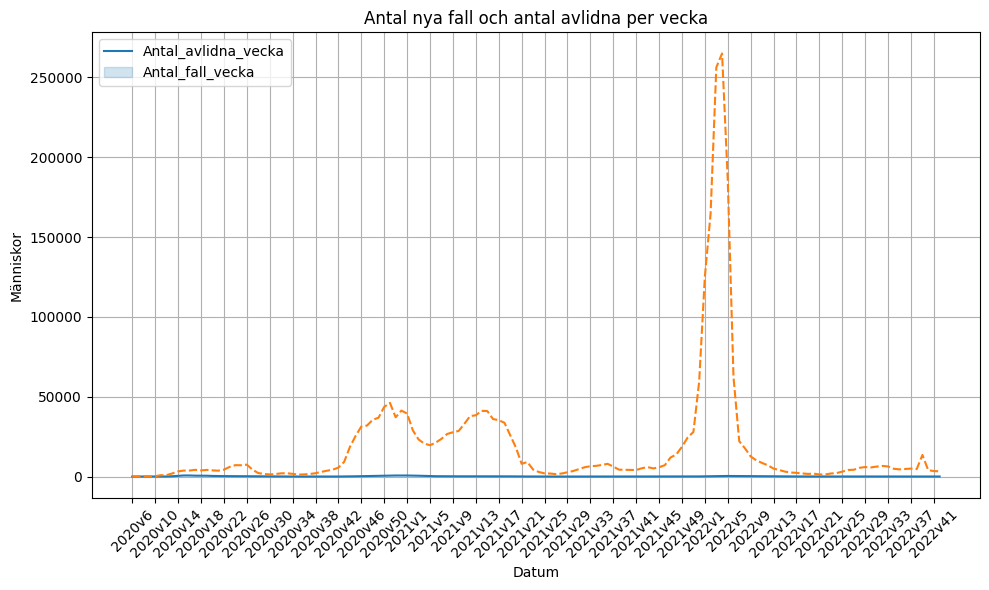

In [30]:
dataset1 = pd.DataFrame(weekly_data_sweden["Antal_avlidna_vecka"])
dataset2 = pd.DataFrame(weekly_data_sweden["Antal_fall_vecka"])

concatenated_dataset = pd.concat([dataset1, dataset2], axis=1)

concatenated_dataset

# Plotting with seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=concatenated_dataset)
plt.title("Antal nya fall och antal avlidna per vecka")
plt.xlabel('Datum')
plt.ylabel('Människor')
plt.legend(['Antal_avlidna_vecka', 'Antal_fall_vecka'], loc='upper left')
# Extract every 4th week from 'Datum' column
every_4th_week = weekly_data_sweden['Datum'].iloc[::4]

# Set these as x-ticks
plt.xticks(ticks=np.arange(len(weekly_data_sweden['Datum']))[::4], labels=every_4th_week, rotation=45)

plt.grid(True)
plt.tight_layout()

plt.savefig("Visualiseringar/kombinerade_avlidna_och_fall_per_vecka_2020v6_till_nu") # Saves the figure to Visualiseringar
plt.show()

### f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu

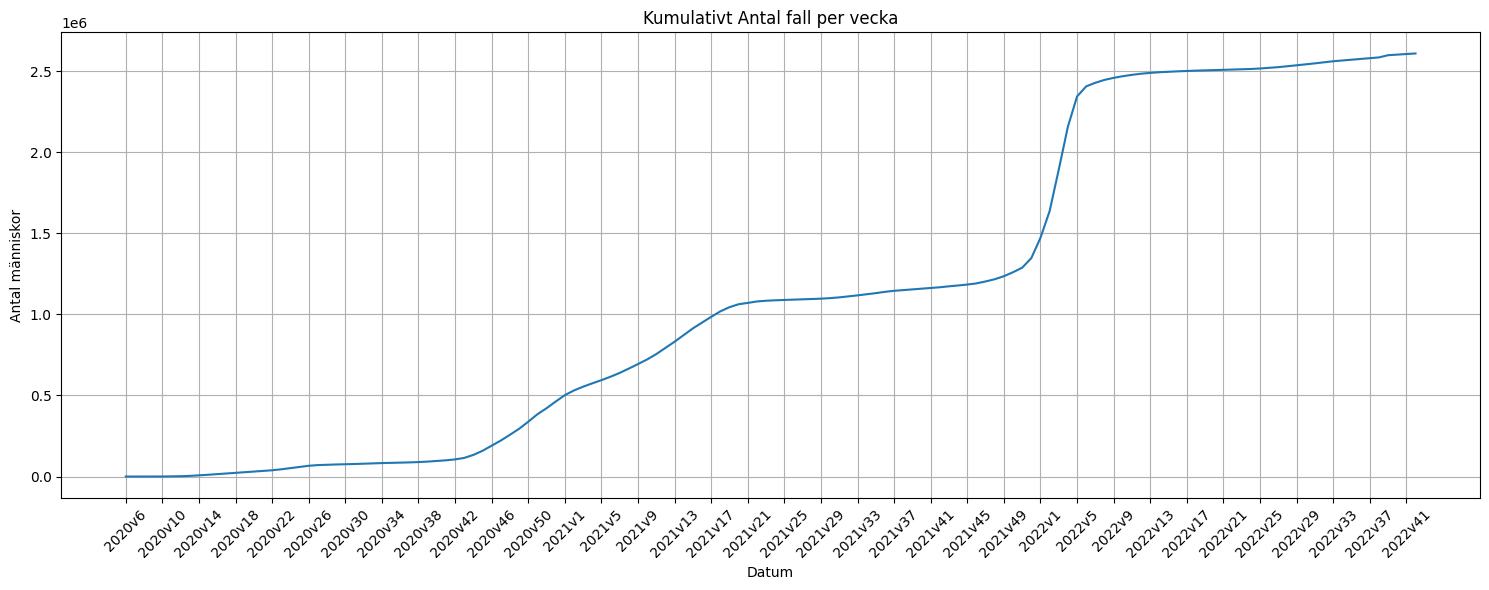

In [34]:
# Creating the line plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Datum', y='Kum_antal_fall', data=weekly_data_sweden)
plt.title('Kumulativt Antal fall per vecka')
plt.xlabel('Datum')
plt.ylabel('Antal människor')

# Setting x-ticks to show every 4 weeks
# Extract every 4th week from 'Datum' column
every_4th_week = weekly_data_sweden['Datum'].iloc[::4]

# Set these as x-ticks
plt.xticks(ticks=np.arange(len(weekly_data_sweden['Datum']))[::4], labels=every_4th_week, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.savefig("Visualiseringar/Kum_antal_fall_per_vecka_2020v6_till_nu") # Saves the figure to Visualiseringar
# Show the plot
plt.show()

### Uppgift 2 - uppvärmning vaccindata


In [56]:
vaccine_data = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx")
vaccine_kommun = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun")
vaccine_sex = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kön")
                            
vaccine_data.columns

vaccine_kommun.columns


Index(['KnKod', 'KnNamn', 'Antal_dos1', 'Antal_dos2', 'Andel_dos1',
       'Andel_dos2'],
      dtype='object')

### a) Hur många län finns representerade i datasetet?


In [43]:
regions = len(vaccine_data["Region"].unique())

print(f"Amount of regions in dataset: {regions-1}") # -1 since the I Sverige I doesn't count as a region

vaccine_data["Region"].unique()



Amount of regions in dataset: 21


array(['| Sverige |', 'Stockholm', 'Uppsala', 'Södermanland',
       'Östergötland', 'Jönköping', 'Kronoberg', 'Kalmar', 'Gotland',
       'Blekinge', 'Skåne', 'Halland', 'Västra Götaland', 'Värmland',
       'Örebro', 'Västmanland', 'Dalarna', 'Gävleborg', 'Västernorrland',
       'Jämtland', 'Västerbotten', 'Norrbotten'], dtype=object)

### b) Hur många kommuner finns representerade i datasetet?

In [50]:
print(f"Antal kommuner i blad 'Vaccinerade kommun': {len(vaccine_kommun["KnNamn"].unique())}")

Antal kommuner i blad 'Vaccinerade kommun': 290


### c) Hur stor är befolkningen som är representerad i datasetet?

In [71]:
#Kollar på Vaccinerade kön och går till "Kön > Totalt > Vaccinationstatus minst 1 dos"

vaccine_sex.query("Vaccinationsstatus == 'Minst 1 dos'")

tot_vaccine = vaccine_sex["Antal vaccinerade"].head(1) 
print(f"Totalt är det {tot_vaccine[0]} människor i datasetet")

Totalt är det 7810380 människor i datasetet


### d) Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp statistik på hur stor totala befolkningen är i Sverige.


In [79]:
#Ifrån google 2022 var folkmängden i Sverige 10 521 556. Antalet kvinnor var 5 223 232 och män 5 298 324
population_2022 = 10521556
under_18 =  population_2022-tot_vaccine[0]
print(f"Det kanske är {under_18} personer")

#Kom precis på att datamägden bara representerade 85% av alla människor som vaccinerat sig vilket motsvarar 17/20 så vi får ta och räkna ut det

estimated_population = tot_vaccine[0] / 0.85
print(estimated_population)
under_18 = population_2022-estimated_population

print(f"Det kanske är {int(under_18.round())} personer")

#Kollade på hur många som föddes mellan 2003-2022 och det var runt 100-110 tusen per år och så då är befolkningsmängden under 18 2022 runt 1 460 000 miljoner

Det kanske är 2711176 personer
9188682.352941176
Det kanske är 1332874 personer


### e) Rita ett diagram som visar på åldersfördelningen av Sveriges befolkning.


In [ ]:
# Börja här imorgon (2023-11-14)

### f) Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per län


### g) Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos, två doser, tre doser och fyra doser